  target      c1                  c2                    c3            c4  c5  \
0    0.0     0.6   3.848024360038754  -0.12489928599664912     -0.876288   a   
1    0.0 -9999.0   3.686711750399645    2.7465579865302554 -16840.562852  fr   
2    1.0     0.6  1.7903405757001267   -0.3791833083216618      1.115662   w   
3    0.0     0.3  2.1368573082176185    1.8436547163343175     -2.593336   w   
4    0.0     0.3  3.3008362240888207     1.492122687471352     -3.033777   f   

    c6   c7   c8                   c9                c10         c11 c12 c13  
0  0.0  1.0  0.0  -1.4022953844807486  996.8002935258253  2019-07-03  qq   q  
1  0.0    _  0.0  -3.0501812364863525  998.0628287070417  2019-04-12  cc   r  
2  1.0  4.0  inf                  inf  997.5618023143123  2019-09-30  aa   t  
3  0.0  1.0  0.0  -0.8521568609928067  998.0647328947183  2019-06-11  dd   u  
4  0.0  3.0  0.0  -0.8116829603342575   1000.64857852335  2019-06-18   _   y  
target     object
c1        float64
c2       

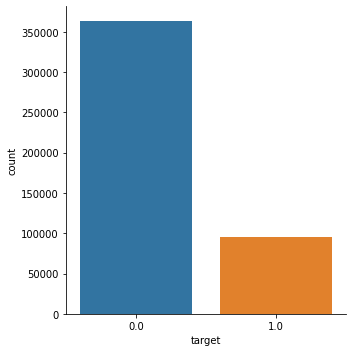

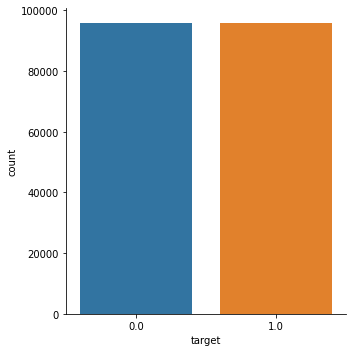

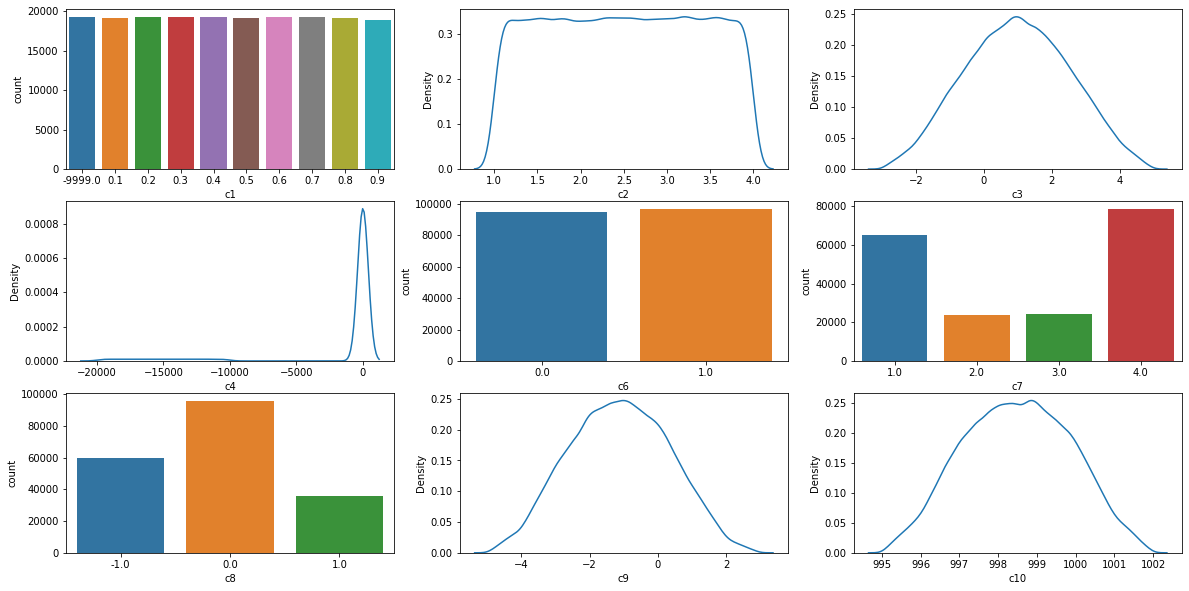

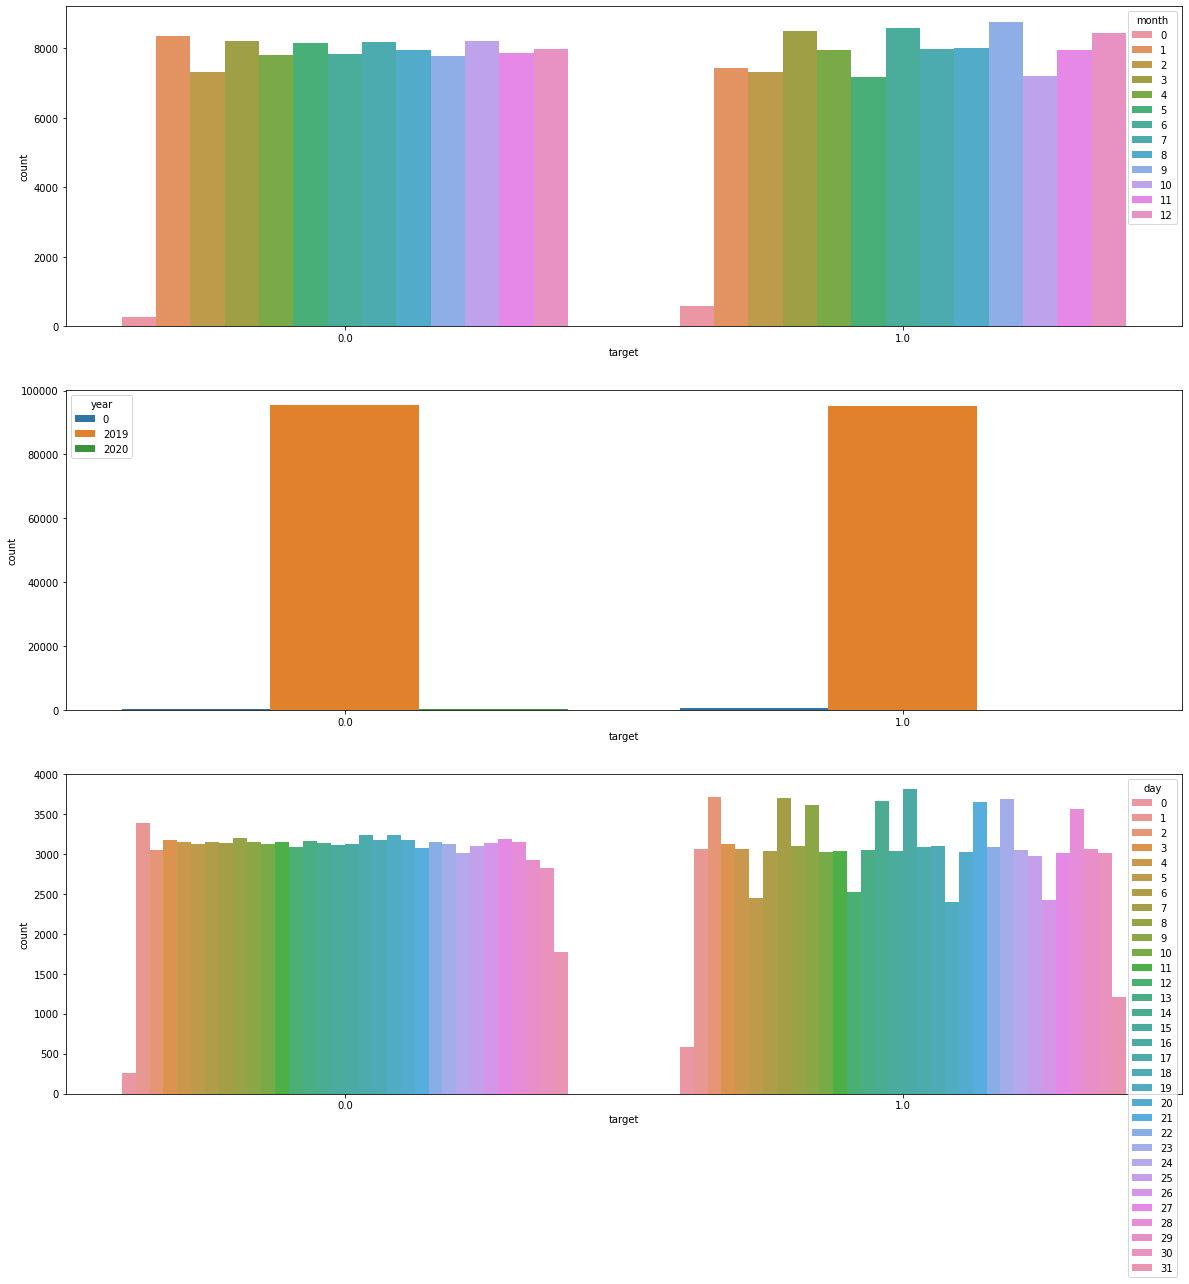

In [1]:
import re
import imblearn
import pandas as pd
import numpy as np
from math import cos,sin,pi
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
data = pd.read_csv('data.csv',sep='}',encoding='UTF-16')

data.shape
print(data.head())
numerical_features = ['c1','c2','c3','c4','c6','c7','c8','c9','c10']
non_numerical_features = ['c5','c11','c12','c13']

print(data.dtypes)
data.target.unique()
data.loc[:,numerical_features] = data.loc[:,numerical_features].replace({'inf':None,'_':None,'-inf':None})
data.dropna(inplace=True)

data.drop(index=data[data['target']=='_'].index,inplace=True)

data['target']=data['target'].replace({'0.0':0,'1.0':1})

data[numerical_features+['target']] = data[numerical_features+['target']].astype('float')

data.dtypes
data.loc[:,['c5','c12','c13']]=data.loc[:,['c5','c12','c13']].apply(LabelEncoder().fit_transform)
print(data.head())

data['c11'].replace('_','0000-00-00',inplace=True)
data['year'] = data['c11'].apply(lambda x : x.split('-')[0]).astype('int')
data['month'] = data['c11'].apply(lambda x : x.split('-')[1]).astype('int')
data['day'] = data['c11'].apply(lambda x : x.split('-')[2]).astype('int')
data.head()

data.drop('c11',axis=1,inplace=True) 
print(data.head())

sns.catplot(x='target',data=data,kind='count')
data['target'].sum()/data['target'].shape[0]
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
y = data['target']
X = data.drop('target',axis=1)
X,y = undersample.fit_resample(X,y)
data_balanced = pd.concat([pd.DataFrame(y),X],axis=1)
data=data_balanced
sns.catplot(x='target',data=data,kind='count')


_,ax = plt.subplots(3,3,figsize=(20,10))
for i,feature in enumerate(numerical_features):
    if data[feature].nunique() > 30:
        sns.kdeplot(ax=ax[i//3][i%3],x=data[feature])
    else:
        sns.countplot(ax=ax[i//3][i%3],x=data[feature])


x = data['c3'].values
ks_statistic, p_value = kstest(x, 'norm')
print(ks_statistic, p_value)
if p_value > 0.05:
    print("Normal distribution")
else:
    print("Abnormal distribution")

x = data['c9'].values
ks_statistic, p_value = kstest(x, 'norm')
print(ks_statistic, p_value)
if p_value > 0.05:
    print("Normal distribution")
else:
    print("Abnormal distribution")


x = data['c2'].values
ks_statistic, p_value = kstest(x, 'uniform')
print(ks_statistic, p_value)
if p_value > 0.05:
    print("Uniform distribution")
else:
    print("Not uniform distribution")


_,ax = plt.subplots(3,1,figsize=(20,20))
for i,feature in enumerate(['month','year','day']):
        sns.countplot(ax=ax[i%3],x='target',hue=feature,data=data)
